<a href="https://colab.research.google.com/github/AstalDLyon/AstalDLyon/blob/main/APS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APS 2 METODOS NUMERICOS COMPUTACIONAIS**
## Professor = Sérgio Assunção Monteiro
---
### Aluno = Breno Alves Deodato
### MAtricula = 2020102195
### Turma = 145R


---



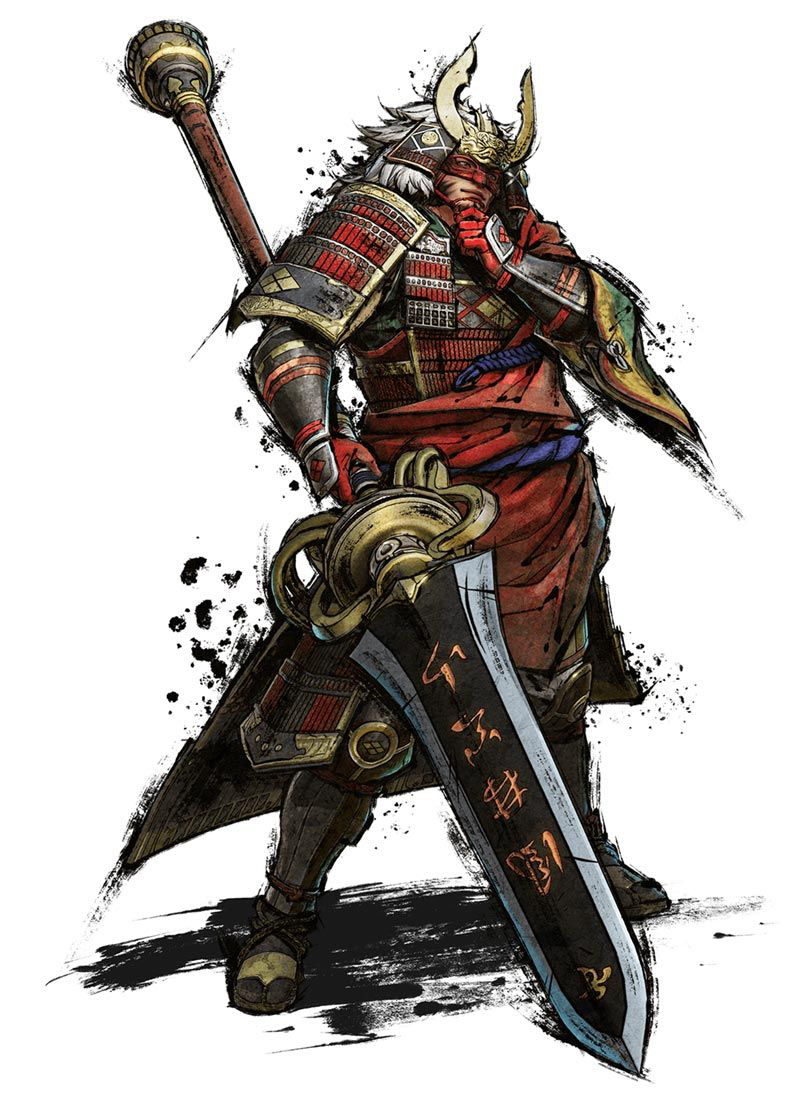

processing...
compressing...
dimensões do canal r: (1100, 800)
arranging...


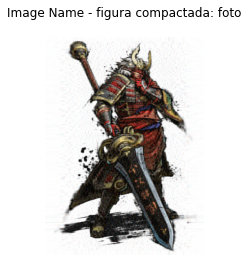

Imagem está com k no valor 60
processing...
compressing...
dimensões do canal r: (1100, 800)
arranging...


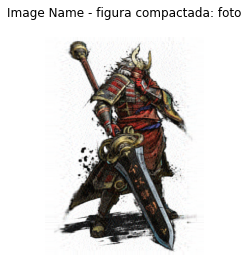

Imagem está com k no valor 70
processing...
compressing...
dimensões do canal r: (1100, 800)
arranging...


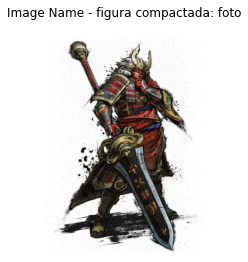

Imagem está com k no valor 80


In [13]:
"""
O trabalho tem 4 objetivos

1 - Carregar uma imagem e transformá-la em um matriz de valores 
reais.
2 - Aplicar a Decomposição da matriz por Valores Singulares
3 - Manter apenas os valores que representam: 60%, 70% e 80% dos 
Valores Singulares
4 - Apresentar a imagem transformada com a aplicação do item
"""


import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import svd
from PIL import Image
import os
from skimage import io
from google.colab.patches import cv2_imshow

def compress_image(img_name, img, k):
    print("processing...")

    # splitting the array into three 2D array (svd only apply on 2D array)
    r = img[:, :, 0]  # array for R
    g = img[:, :, 1]  # array for G
    b = img[:, :, 2]  # array for B

    print("compressing...")

    # Calculating the svd components for all three arrays
    ur, sr, vr = svd(r, full_matrices=False)
    ug, sg, vg = svd(g, full_matrices=False)
    ub, sb, vb = svd(b, full_matrices=False)
    print('dimensões do canal r: {}'.format(r.shape))

    # Forming the compress image with reduced information
    # We are selecting only k singular values for each array to make image which will exclude some information from the
    # image while image will be of same dimension

    # ur (mxk), diag(sr) (kxk) and vr (kxn) if image is off (mxn)
    # so let suppose we only selecting the k1 singular value from diag(sr) to form image

    rr = np.dot(ur[:, :k], np.dot(np.diag(sr[:k]), vr[:k, :]))
    rg = np.dot(ug[:, :k], np.dot(np.diag(sg[:k]), vg[:k, :]))
    rb = np.dot(ub[:, :k], np.dot(np.diag(sb[:k]), vb[:k, :]))

    print("arranging...")

    # Creating a array of zeroes; shape will be same as of image matrix
    rimg = np.zeros(img.shape)

    # Adding matrix for R, G & B in created array
    rimg[:, :, 0] = rr
    rimg[:, :, 1] = rg
    rimg[:, :, 2] = rb

    # It will check if any value will be less than 0 will be converted to its absolute
    # and, if any value is greater than 255 than it will be converted to 255
    # because in image array of unit8 can only have value between 0 & 255
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1, ind2, ind3] = abs(value)
                if value > 255:
                    rimg[ind1, ind2, ind3] = 255

    # converting the compress image array to uint8 type for further conversion into image object
    compressed_image = rimg.astype(np.uint8)

    # Showing the compressed image in graph
    plt.title("Image Name - figura compactada: " + img_name + "\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    cv2.imwrite("Imagem/comp-" + str(img_name) + ".jpg", compressed_image)

    # Uncomment below code if you want to save your compressed image to the file
    # compressed_image = Image.fromarray(compressed_image)
    # compressed_image.save("image_name.jpg")


origem = "https://i.pinimg.com/originals/3b/b3/05/3bb305c9cd78e028ff2167f0cb73bb56.jpg"
image = io.imread(origem)
data = asarray(image)  # Transforma a imagem em array e logo depois mostra a saida de dados
# print(data)  # esse print é meramente para a visualização da conversão
# print('\n')
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# pra evitar que a imagem fique azul
cv2_imshow(RGB_img)
k = [60, 70, 80]
for x in range(len(k)):
 compress_image("foto", image, k[x])
 print(f'Imagem está com k no valor {k[x]}')